In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
import time
import math

In [2]:
def acc(a):
    a = np.array(a)
    x,y=a.shape
    for i in range(0,x-1):
        for j in range(0,y):
            a[i][j]=a[i+1][j]-a[i][j]
    a=np.delete(a, -1, axis=0)
    
    return a

In [3]:
def res(arr,x,y):
    zeroarray=np.zeros((1,y))
    #print(arr.shape)
    k=120-x+1
    if x<=120:
        for i in range(1,k):
            arr = np.vstack((arr,zeroarray))      #重設矩陣大小
    return arr

In [4]:
def cal_ang(point1,point2,point3):
    a=math.sqrt((point2[0]-point3[0])*(point2[0]-point3[0])+(point2[1]-point3[1])*(point2[1]-point3[1]))
    b=math.sqrt((point1[0]-point3[0])*(point1[0]-point3[0])+(point1[1]-point3[1])*(point1[1]-point3[1]))
    c=math.sqrt((point1[0]-point2[0])*(point1[0]-point2[0])+(point1[1]-point2[1])*(point1[1]-point2[1]))
    A=math.degrees(math.acos((a*a-b*b-c*c)/(-2*b*c)))
    B=math.degrees(math.acos((b*b-a*a-c*c)/(-2*a*c)))
    C=math.degrees(math.acos((c*c-a*a-b*b)/(-2*a*b)))
    
    return B

In [5]:
#原始
def data_all(dirdata1,dirdata2):
    data = []
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)

        data.append(x)
        label.append(1)
    
    
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [6]:
#刪減
def data_new(dirdata1,dirdata2):
    data = []
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        #移除15,16,17,18,20,21,23,24點位
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)

        data.append(x)
        label.append(1)
    
    
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [7]:
#加速度
def data_acc(dirdata1,dirdata2):
    data = []
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        x=acc(acc(x))
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        x=acc(acc(x))
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(1)
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [8]:
#角度
def data_ang(dirdata1,dirdata2):
    data = []
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        
        a,b=x.shape
        register=[]
        for i in range(0,a-1):
            #取得角度
            ang=[cal_ang((x[i][4],x[i][5]),(x[i][6],x[i][7]),(x[i][8],x[i][9])),cal_ang((x[i][2],x[i][3]),(x[i][4],x[i][5]),(x[i][6],x[i][7]))]
            if i==0:
                register=ang
            else:
                register = np.vstack((register,ang))
        
        a,b=register.shape
        #重設大小
        x=res(register,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        a,b=x.shape
        register=[]
        for i in range(0,a-1):
            #取得角度
            ang=[cal_ang((x[i][4],x[i][5]),(x[i][6],x[i][7]),(x[i][8],x[i][9])),cal_ang((x[i][2],x[i][3]),(x[i][4],x[i][5]),(x[i][6],x[i][7]))]
            if i==0:
                register=ang
            else:
                register = np.vstack((register,ang))
        
        a,b=register.shape
        #重設大小
        x=res(register,a,b)
        x = np.array(x)
        data.append(x)
        label.append(1)
    
    
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [9]:
dirdata1='正手訓/'
dirdata2='反手訓/'

In [10]:
data,label=data_acc(dirdata1,dirdata2)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(294, 120, 50)

In [17]:
data.shape

(440, 120, 50)

In [14]:
x=np.load('正手訓/IMG_0734-48.npy')

In [15]:
print(x.shape)
print(x)

(82, 50)
[[ 945.2158    127.07994   874.67053  ... 1045.2557    736.303
   998.1963  ]
 [ 945.21924   127.1266    874.60626  ... 1045.2272    736.2855
   998.18915 ]
 [ 942.2864    127.032646  874.6234   ... 1042.4469    736.32477
   998.1998  ]
 ...
 [ 989.4468    129.94344   907.1098   ... 1045.2844    739.1518
   998.2711  ]
 [ 986.5149    129.88577   907.0568   ... 1045.2931    736.2974
   998.2078  ]
 [ 986.43616   129.93446   907.03735  ... 1045.2872    736.28345
   998.22864 ]]


In [20]:
#建立模型
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(data.shape[1],data.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 118, 64)           9664      
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 116, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 58, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3712)              0         
                                                                 
 dense (Dense)               (None, 100)               371300    
                                                        

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
history = model.fit(X_train,Y_train, epochs=100, validation_split=0.2, batch_size=30, verbose=1)
end_time = time.time()

Epoch 1/100
8/8 [==============================] - 4s 52ms/step - loss: 12.0158 - accuracy: 0.5660 - val_loss: 9.1306 - val_accuracy: 0.6102
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 7.1832 - accuracy: 0.7872 - val_loss: 6.1980 - val_accuracy: 0.6441
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 1.9064 - accuracy: 0.7404 - val_loss: 6.0681 - val_accuracy: 0.5932
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5361 - accuracy: 0.8298 - val_loss: 2.7924 - val_accuracy: 0.7627
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.9362 - val_loss: 1.5835 - val_accuracy: 0.8475
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.9574 - val_loss: 1.6389 - val_accuracy: 0.9153
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0604 - accuracy: 0.9915 - val_loss: 1.7870 - val_accuracy: 0.9322
Epoch 8/100
8/8 [========

In [19]:
execution_time = (end_time - start_time)
print("執行時間: ",execution_time,"s")

執行時間:  8.491073608398438 s


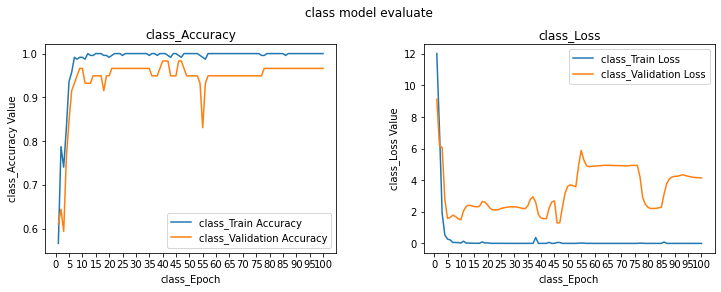

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,101))
ax1.plot(class_epoch_list, history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [76]:
#model.save('1d_cnn_ang_100epo.h5')

In [22]:
modello = keras.models.load_model('1d_cnn_all_100epo.h5')

In [21]:
test_dirdata1='正手測/'
test_dirdata2='反手測/'

In [24]:
test_data,test_label=data_acc(test_dirdata1,test_dirdata2)

In [25]:
count,x,y=test_data.shape

In [26]:
test_data.shape

(260, 120, 50)

In [27]:
time_pre=model.predict(test_data,verbose=2)

9/9 - 0s - 182ms/epoch - 20ms/step


In [28]:
test_label[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
time_pre[:3]

array([[1.0000000e+00, 3.6302834e-22],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [30]:
Y_test = np.argmax(test_label,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

              precision    recall  f1-score   support

    forehand       0.65      0.98      0.78       115
    backhand       0.98      0.58      0.73       145

    accuracy                           0.76       260
   macro avg       0.81      0.78      0.75       260
weighted avg       0.83      0.76      0.75       260



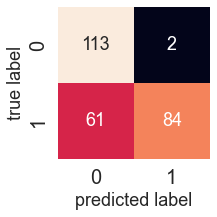

In [31]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["forehand","backhand"]
print(classification_report(Y_test,Y_pred,target_names=target_names))

Text(0.5, 1.0, 'Predicted label (first 100)')

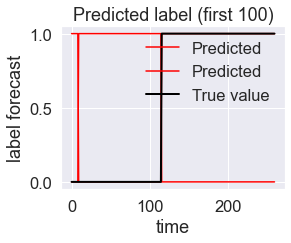

In [34]:
plt.figure(figsize=(4,3))


# plt.subplot(3,1,1)
plt.plot(time_pre[:500], color = 'red', label = 'Predicted')
plt.plot(Y_test[:500], color = 'black', linewidth=2, label = 'True value')

plt.legend(frameon=False)
plt.ylabel("label forecast")
plt.xlabel("time")
plt.title("Predicted label (first 100)")